<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/DSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Differentiable Support Vector Clustering (DSVC)

(Fayyaz Minhas)

We derive the dual of the SVC optimization problem, starting from the **primal formulation**.

---

### 🔧 Primal Problem

We want to find the smallest sphere in feature space that encloses the data mapped via $\Phi(x)$:

Minimize:
$$
\min_{R, a, \{\xi_i\}} \quad R^2 + C \sum_{i=1}^N \xi_i
$$

Subject to:
$$
\|\Phi(x_i) - a\|^2 \leq R^2 + \xi_i, \quad \xi_i \geq 0
$$

---

### 🧮 Step 1: Lagrangian

Introduce Lagrange multipliers:

- $\beta_i \geq 0$ for $\|\Phi(x_i) - a\|^2 - R^2 - \xi_i \leq 0$
- $\mu_i \geq 0$ for $\xi_i \geq 0$

The Lagrangian is:
$$
\mathcal{L} = R^2 + C \sum_i \xi_i
- \sum_i \beta_i (R^2 + \xi_i - \|\Phi(x_i) - a\|^2)
- \sum_i \mu_i \xi_i
$$

Simplify:
$$
\mathcal{L} = R^2(1 - \sum_i \beta_i)
+ \sum_i \xi_i (C - \beta_i - \mu_i)
+ \sum_i \beta_i \|\Phi(x_i) - a\|^2
$$

---

### 🧮 Step 2: Stationarity Conditions

**Derivative w.r.t. $R$:**
$$
\frac{\partial \mathcal{L}}{\partial R} = 2R(1 - \sum_i \beta_i) = 0
\Rightarrow \sum_i \beta_i = 1 \tag{1}
$$

**Derivative w.r.t. $a$:**
$$
\frac{\partial \mathcal{L}}{\partial a} = -2 \sum_i \beta_i (\Phi(x_i) - a) = 0
\Rightarrow a = \sum_i \beta_i \Phi(x_i) \tag{2}
$$

**Derivative w.r.t. $\xi_i$:**
$$
\frac{\partial \mathcal{L}}{\partial \xi_i} = C - \beta_i - \mu_i = 0
\Rightarrow \beta_i = C - \mu_i \Rightarrow 0 \leq \beta_i \leq C \tag{3}
$$

---

### 🧩 Step 3: Dual Objective

Substitute into the Lagrangian:

$$
\|\Phi(x_i) - a\|^2 = \|\Phi(x_i)\|^2 - 2a \cdot \Phi(x_i) + \|a\|^2
$$

Use:
- $K(x_i, x_j) = \Phi(x_i) \cdot \Phi(x_j)$
- $a = \sum_j \beta_j \Phi(x_j)$

Then:
- $a \cdot \Phi(x_i) = \sum_j \beta_j K(x_j, x_i)$
- $\|a\|^2 = \sum_{j,k} \beta_j \beta_k K(x_j, x_k)$
- $\|\Phi(x_i)\|^2 = K(x_i, x_i)$

So:
$$
\|\Phi(x_i) - a\|^2 = K(x_i, x_i) - 2 \sum_j \beta_j K(x_j, x_i) + \sum_{j,k} \beta_j \beta_k K(x_j, x_k)
$$

Dual objective:
$$
W(\beta) = \sum_i \beta_i \|\Phi(x_i) - a\|^2
$$

Substitute:
$$
W(\beta) = \sum_i \beta_i K(x_i, x_i)
- 2 \sum_{i,j} \beta_i \beta_j K(x_i, x_j)
+ \sum_{i,j} \beta_i \beta_j K(x_i, x_j)
$$

Simplify:
$$
W(\beta) = \sum_i \beta_i K(x_i, x_i)
- \sum_{i,j} \beta_i \beta_j K(x_i, x_j)
$$

---

### ✅ Dual QP Formulation

Maximize:
$$
\max_{\beta} \quad W(\beta) = \sum_i \beta_i K(x_i, x_i)
- \sum_{i,j} \beta_i \beta_j K(x_i, x_j)
$$

Subject to:
$$
\sum_i \beta_i = 1, \quad 0 \leq \beta_i \leq C
$$

## 📌 Cluster Assignment in Support Vector Clustering (SVC)

After solving the dual optimization problem, we obtain the Lagrange multipliers $\beta_i$ and define a hypersphere in the feature space centered at:
$$
a = \sum_i \beta_i \Phi(x_i)
$$

with radius:
$$
R = \|\Phi(x_s) - a\| \quad \text{for any support vector } x_s \text{ with } 0 < \beta_s < C
$$

We define the squared distance of any point $x$ from the center $a$ as:
$$
R^2(x) = \|\Phi(x) - a\|^2 = K(x, x) - 2 \sum_j \beta_j K(x_j, x) + \sum_{i,j} \beta_i \beta_j K(x_i, x_j)
$$

---

### 🧠 Interpretation

- Points for which $R^2(x) < R^2$ lie **inside** the sphere → belong to some cluster.
- Points for which $R^2(x) = R^2$ lie **on** the boundary → support vectors.
- Points for which $R^2(x) > R^2$ lie **outside** the sphere → bounded support vectors (BSVs), treated as unclassified initially.

---

## 🔗 Cluster Assignment Rule

Two points $x_i$ and $x_j$ are assigned to the **same cluster** if **every point on the line segment between them** lies **inside or on** the sphere.

That is, define the line segment:
$$
y(t) = (1 - t)x_i + t x_j, \quad t \in [0, 1]
$$

Let $R(y(t)) = \|\Phi(y(t)) - a\|$.

Then we say:
$$
x_i \sim x_j \iff R(y(t)) \leq R \quad \text{for all } t \in [0, 1]
$$

---

### 🔢 Adjacency Matrix

We define the adjacency matrix $A_{ij}$ as:
$$
A_{ij} =
\begin{cases}
1 & \text{if } R(y(t)) \leq R \text{ for all } t \in [0, 1] \\
0 & \text{otherwise}
\end{cases}
$$

In practice, the condition is checked by **sampling** several values of $t$ along the line segment (e.g., 20 evenly spaced points).

---

### 🔍 Final Clustering

- Construct a **graph** where nodes are data points and edges are given by $A_{ij} = 1$.
- Compute **connected components** of this graph → each is a **cluster**.
- **BSVs** (points with $R^2(x) > R^2$) are left **unassigned**, or optionally assigned to the **nearest cluster**.

---

### 📝 Summary

- Cluster connectivity is **not** based on label propagation or density.
- Instead, it is based on **path continuity inside the feature space sphere**.
- This makes SVC capable of discovering **arbitrary shaped clusters**.


### 📌 Solving the Dual of Support Vector Clustering (SVC) with `qpth`

The dual of the Support Vector Clustering (SVC) problem is expressed as the following quadratic program:

$$
\max_{\boldsymbol{\beta}} \quad W(\boldsymbol{\beta}) = \sum_i \beta_i K(x_i, x_i) - \sum_{i,j} \beta_i \beta_j K(x_i, x_j)
$$

subject to:

$$
\sum_i \beta_i = 1, \quad 0 \leq \beta_i \leq C
$$

---

### 🔁 Reformulation as a Standard QP

To solve this using `qpth`, we rewrite it in the standard QP minimization form:

$$
\min_{\mathbf{x}} \quad \frac{1}{2} \mathbf{x}^T Q \mathbf{x} + \mathbf{p}^T \mathbf{x}
$$

subject to:

$$
G\mathbf{x} \leq \mathbf{h}, \quad A\mathbf{x} = \mathbf{b}
$$

The mapping from the SVC dual to this form is as follows:

- Decision variable: $\mathbf{x} = \boldsymbol{\beta}$
- Quadratic term: $Q = K$ (kernel matrix, symmetrized and regularized to be SPD)
- Linear term: $\mathbf{p} = -\text{diag}(K)$
- Equality constraint: $A = \mathbf{1}^T$, $\mathbf{b} = [1]$
- Inequality constraints:
  $$
  G = \begin{bmatrix} I \\ -I \end{bmatrix}, \quad
  \mathbf{h} = \begin{bmatrix} C\mathbf{1} \\ \mathbf{0} \end{bmatrix}
  $$

This enforces the box constraint: $0 \leq \beta_i \leq C$ for all $i$.

---

### ✅ Why `qpth` is a Good Fit

- 🔄 **Direct Mapping**: The SVC dual problem fits naturally into the standard QP format expected by `qpth`.
- ⚙️ **Differentiability**: `qpth` is fully differentiable and integrates with PyTorch’s autograd, allowing:
  - End-to-end training through the QP solution.
  - Gradient-based learning over kernel parameters or data embeddings.
- ⚡ **Efficiency**: `qpth` uses a tailored interior-point method that is fast and memory-efficient for moderate-sized problems (e.g., 100–1000 points).

---

### 🧠 Summary

The dual of Support Vector Clustering is a well-structured convex QP.  
`qpth` provides an efficient and differentiable way to solve this problem inside a PyTorch workflow — enabling both standalone clustering and integration into deep learning pipelines.


In [1]:
!pip install qpth

[1.66666713e-02 1.66666564e-02 1.21527398e-02 2.03744322e-03
 1.59277079e-07 6.71909703e-03 2.50987569e-08 5.00142505e-08
 3.19323293e-03 9.51083004e-03 4.54795099e-08 1.32149580e-08
 9.87811291e-08 2.90531261e-08 6.68301254e-08 6.95463130e-03
 2.57136890e-08 1.11482223e-07 1.83853217e-08 2.04860271e-08
 1.50548508e-02 1.66666433e-02 1.07353344e-08 3.15799298e-08
 1.06129391e-07 1.13114311e-07 2.74268359e-08 5.85221187e-08
 4.00117642e-07 3.30741159e-08 1.66666247e-02 3.36269441e-04
 2.04754542e-08 2.58654609e-08 1.66666377e-02 1.66665968e-02
 1.29682121e-07 2.62622780e-06 5.49898687e-08 1.09130284e-04
 2.85092788e-03 7.98077053e-08 2.48348897e-08 1.66666657e-02
 6.50099537e-07 1.02546892e-07 2.32032562e-08 3.70234829e-08
 9.15702003e-08 1.66666675e-02 1.52454049e-08 7.81119525e-08
 1.48144181e-08 1.59687943e-08 2.83775989e-08 1.66666638e-02
 8.55727649e-08 1.89006641e-08 1.96644454e-03 2.64579967e-08
 3.01920409e-08 2.30030537e-08 1.59682713e-07 1.66666470e-02
 1.92934522e-08 5.104175

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


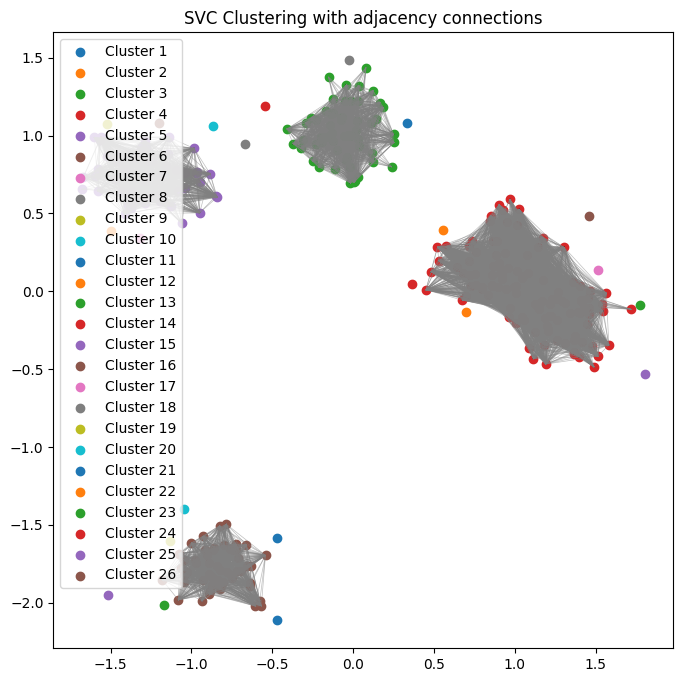

tensor([-1, -1,  3,  4,  3,  5, 22,  6,  5,  4], dtype=torch.int32)


In [2]:
import torch
import torch.nn as nn
import numpy as np
from qpth.qp import QPFunction
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def make_spd(Q, eps_scale=1e-4):
    Q = 0.5 * (Q + Q.T)
    eps = eps_scale * torch.norm(Q)
    return Q + eps * torch.eye(Q.shape[0], device=Q.device)

class SVClust(nn.Module):
    def __init__(self, p=0.1, q=1.0, kernel_mode='rbf'):
        super().__init__()
        assert kernel_mode in ['rbf', 'precomputed'], "Invalid kernel_mode"
        self.p = p
        self.q = q
        self.kernel_mode = kernel_mode
        self.beta = None
        self.R2 = None
        self.quad_term = None
        self.X_train = None
        self.K_train = None
        self.labels_ = None
        self.cluster_centroids_ = None

    def forward(self, input):
        if self.kernel_mode == "precomputed":
            K = input.to(device)
            N = K.shape[0]
            self.X_train = None
            self.K_train = K
        else:
            X = input.to(device)
            self.X_train = X
            N = X.shape[0]
            dist2 = torch.cdist(X, X, p=2).pow(2)
            K = torch.exp(-self.q * dist2)
            self.K_train = K

        C = 1 / (N * self.p)
        Q = make_spd(K)
        p_vec = -torch.diag(K)
        G = torch.cat([torch.eye(N, device=K.device), -torch.eye(N, device=K.device)], dim=0)
        h = torch.cat([C * torch.ones(N, device=K.device), torch.zeros(N, device=K.device)])
        A = torch.ones(1, N, device=K.device)
        b = torch.tensor([1.0], device=K.device)

        self.beta = QPFunction(verbose=False)(Q, p_vec, G, h, A, b).view(-1)
        self.quad_term = torch.dot(self.beta, K @ self.beta)

        tol = 1e-6
        sv_mask = (self.beta > tol) & (self.beta < C)
        SVs = torch.where(sv_mask)[0]

        if len(SVs) == 0:
            self.R2 = torch.tensor(0.0, device=K.device)
        else:
            selected = SVs[:min(5, len(SVs))]
            terms = torch.diagonal(K[selected][:, selected])
            cross = K[selected] @ self.beta
            self.R2 = torch.mean(terms - 2 * cross + self.quad_term)

        diag_K = torch.diag(K)
        loss = 0.5 * torch.dot(self.beta, K @ self.beta) - torch.dot(self.beta, diag_K)

        return self.beta, self.R2, loss



    def compute_adjacency(self, T=5):
        assert self.X_train is not None, "X_train required for correct interpolation."

        X_np = self.X_train.cpu().numpy()
        N = X_np.shape[0]
        beta_val = self.beta.detach().cpu().numpy().ravel()
        R2 = self.R2.item()
        C = 1 / (N * self.p)

        tol = 1e-6
        sv_mask = (beta_val > tol) & (beta_val < C)
        bsv_mask = beta_val >= C
        BSVs = np.where(bsv_mask)[0]

        adj = np.zeros((N, N), dtype=bool)
        quad_term = beta_val @ self.K_train.cpu().numpy() @ beta_val

        for i in range(N):
            if i in BSVs: continue
            for j in range(i + 1, N):
                if j in BSVs: continue
                alphas = np.linspace(0, 1, T+2)[1:-1]
                connected = True
                for alpha in alphas:
                    x_interp = (1-alpha)*X_np[i] + alpha*X_np[j]
                    k_x = np.exp(-self.q * np.sum((X_np - x_interp)**2, axis=1))
                    R2_x = 1 - 2 * np.dot(beta_val, k_x) + quad_term
                    if R2_x > R2:
                        connected = False
                        break
                if connected:
                    adj[i, j] = adj[j, i] = True
        return adj

    def compute_adjacency_vectorized(self, T=5):
        assert self.X_train is not None, "X_train required."

        X_np = self.X_train.cpu().numpy()
        N = X_np.shape[0]
        beta_val = self.beta.detach().cpu().numpy()
        quad_term = beta_val @ self.K_train.cpu().numpy() @ beta_val
        R2 = self.R2.item()

        tol = 1e-6
        C = 1 / (N * self.p)
        bsv_mask = beta_val >= C
        BSVs = np.where(bsv_mask)[0]

        adj = np.zeros((N, N), dtype=bool)
        alphas = np.linspace(0, 1, T+2)[1:-1][:, None, None]  # Shape: (T, 1, 1)

        for i in range(N):
            if i in BSVs: continue

            xi = X_np[i]
            xj = X_np[i+1:]
            indices_j = np.arange(i+1, N)
            mask_j = ~np.isin(indices_j, BSVs)
            xj = xj[mask_j]
            indices_j = indices_j[mask_j]

            if len(xj) == 0:
                continue

            interp_points = (1 - alphas) * xi + alphas * xj  # Shape: (T, len(xj), features)
            interp_points_flat = interp_points.reshape(-1, X_np.shape[1])

            # Vectorized kernel calculation
            dists2 = cdist(interp_points_flat, X_np, 'sqeuclidean')  # Shape: (T*len(xj), N)
            k_x = np.exp(-self.q * dists2)  # Kernel evaluations

            R2_x = 1 - 2 * (k_x @ beta_val) + quad_term  # Shape: (T*len(xj), )
            R2_x = R2_x.reshape(T, len(xj))

            connected = np.all(R2_x <= R2, axis=0)

            adj[i, indices_j[connected]] = True
            adj[indices_j[connected], i] = True

        return adj



    def cluster(self, T=20, assign_BSV_to_nearest=True):
        adj = self.compute_adjacency_vectorized(T)
        G = nx.Graph(adj)
        clusters = list(nx.connected_components(G))
        labels = -np.ones(adj.shape[0], dtype=int)
        cluster_centroids = []

        for i, cluster in enumerate(clusters):
            indices = list(cluster)
            labels[indices] = i + 1
            if self.X_train is not None:
                cluster_centroids.append(self.X_train[indices].detach().cpu().numpy().mean(axis=0))

        if assign_BSV_to_nearest and cluster_centroids:
            centroids = np.vstack(cluster_centroids)
            X_np = self.X_train.detach().cpu().numpy()
            BSVs = np.where(labels == -1)[0]
            dists = cdist(X_np[BSVs], centroids)
            nearest = np.argmin(dists, axis=1)
            for idx, cid in zip(BSVs, nearest):
                labels[idx] = cid + 1

        self.labels_ = labels
        self.cluster_centroids_ = np.vstack(cluster_centroids) if cluster_centroids else None
        return labels, adj

    def predict(self, XK):
        if self.kernel_mode == 'precomputed':
            K_test = torch.tensor(XK, dtype=torch.float32).to(device)
        else:
            X_test = torch.tensor(XK, dtype=torch.float32).to(device)
            dist2 = torch.cdist(self.X_train, X_test, p=2).pow(2)
            K_test = torch.exp(-self.q * dist2)

        beta_val = self.beta.detach()
        quad_term = torch.dot(beta_val, self.K_train @ beta_val).item()
        R2_x = 1 - 2 * torch.mv(K_test.T, beta_val) + quad_term

        inside_mask = R2_x <= self.R2.item()
        labels = -torch.ones(K_test.shape[1], dtype=torch.int, device=device)

        if self.cluster_centroids_ is not None and X_test is not None:
            dists = cdist(X_test.cpu().numpy(), self.cluster_centroids_)
            nearest = np.argmin(dists, axis=1)
            labels[inside_mask] = torch.tensor(nearest + 1, dtype=torch.int, device=device)[inside_mask]

        return labels

if __name__ == "__main__":
    # Generate 2D dataset
    from sklearn.datasets import make_moons, make_circles, make_blobs

    X_np, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
    X_np, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
    X_np, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

    X_np = StandardScaler().fit_transform(X_np)
    X = torch.tensor(X_np, dtype=torch.float32)

    # Run SVC
    model = SVClust(p=0.2, q=10.0)
    beta, R2, loss = model(X)
    print(beta.cpu().numpy())
    print(loss.item())
    # Usage example outside your function:
    labels, adjacency = model.cluster()

    # Plot results with adjacency connections
    plt.figure(figsize=(8, 8))

    # First plot points
    for lbl in np.unique(labels):
        mask = labels == lbl
        plt.scatter(X_np[mask, 0], X_np[mask, 1], label=f"Cluster {lbl}")

    # Now plot edges (connections)
    for i in range(adjacency.shape[0]):
        for j in range(i+1, adjacency.shape[1]):
            if adjacency[i, j]:
                plt.plot(
                    [X_np[i, 0], X_np[j, 0]],
                    [X_np[i, 1], X_np[j, 1]],
                    color='gray', linewidth=0.5, alpha=0.5
                )

    plt.legend()
    plt.title("SVC Clustering with adjacency connections")
    plt.show()


    # Test new points
    X_test = X_np[:10] + 0.01  # small offset
    pred_labels = model.predict(X_test)
    print(pred_labels)

In [3]:
np.mean(adjacency,axis=0)

array([0.        , 0.        , 0.18333333, 0.36333333, 0.18      ,
       0.17      , 0.36      , 0.17333333, 0.17      , 0.36666667,
       0.36666667, 0.17666667, 0.36666667, 0.17666667, 0.36      ,
       0.18      , 0.36      , 0.36666667, 0.35333333, 0.18      ,
       0.17666667, 0.        , 0.17666667, 0.36      , 0.36333333,
       0.18333333, 0.17666667, 0.36333333, 0.36666667, 0.17666667,
       0.        , 0.36666667, 0.36      , 0.17      , 0.        ,
       0.33      , 0.36333333, 0.36666667, 0.17333333, 0.36333333,
       0.17666667, 0.36666667, 0.17666667, 0.        , 0.36666667,
       0.17      , 0.17333333, 0.17333333, 0.36666667, 0.        ,
       0.17333333, 0.35666667, 0.17666667, 0.17      , 0.18      ,
       0.        , 0.35666667, 0.18      , 0.17      , 0.17666667,
       0.18333333, 0.17      , 0.36333333, 0.14      , 0.17666667,
       0.36333333, 0.        , 0.17333333, 0.17333333, 0.17666667,
       0.36333333, 0.16333333, 0.16666667, 0.36666667, 0.17333

In [4]:
# Using kernel

import torch
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

# Generate data
#X_np, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
#X_np = StandardScaler().fit_transform(X_np)

# Matching gamma to q parameter from the feature-based example
gamma = 10

# Precompute RBF kernel
K_np = rbf_kernel(X_np, X_np, gamma=gamma)

# Run SVClust with precomputed kernel
model_kernel = SVClust(p=0.1, q=gamma, kernel_mode='precomputed')
beta, R2, loss = model_kernel(torch.tensor(K_np, dtype=torch.float32))
print(beta.cpu().numpy())
print(loss.item())
labels_kernel = model_kernel.cluster()

# Plot results
plt.figure(figsize=(6, 6))
for lbl in np.unique(labels_kernel):
    mask = labels_kernel == lbl
    plt.scatter(X_np[mask, 0], X_np[mask, 1], label=f"Cluster {lbl}")
plt.legend()
plt.title("Support Vector Clustering (Precomputed Kernel)")
plt.show()

# Predict with precomputed kernel
X_test = X_np[:10] + 0.01  # Small offset
K_test = rbf_kernel(X_np, X_test, gamma=gamma)
pred_labels_kernel = model_kernel.predict(K_test)
print("Predicted labels (precomputed kernel):", pred_labels_kernel.cpu().numpy())


[ 3.33333351e-02  3.20695154e-02  1.32479727e-07  6.09202916e-03
  3.52539473e-08  1.01343630e-07  1.11533893e-08  4.13425596e-08
  8.36621411e-03  6.27319375e-03  3.06148422e-08  6.44735110e-09
  1.94308974e-04  1.62062292e-08  1.05680442e-08  2.02018414e-02
  1.69662826e-08  2.64862273e-03  7.48974571e-09  1.29568605e-08
  1.74291927e-07  1.80025753e-02  1.06530536e-08  1.31491902e-08
  2.70853207e-08  2.76859282e-08  2.25912800e-08  2.01129637e-08
  3.43630745e-07  1.48944537e-08  7.81538524e-03  3.64672451e-06
  7.65408004e-09  1.49203743e-08  1.62065122e-02  6.80489372e-03
  7.72427029e-08  1.53109795e-07  8.59600391e-09  1.99771748e-05
  1.46413299e-08  4.45520527e-08  1.75827495e-08  2.11700648e-02
  2.36603228e-07  1.01351532e-08  5.94218363e-09  3.89225079e-08
  2.74212653e-08  3.33333351e-02  7.11384018e-09  2.02861656e-08
  1.31598199e-08  1.11933218e-08  1.74566708e-08  1.86183099e-02
  5.03146111e-08  1.78832238e-08  1.57540399e-08  1.11884333e-08
  1.00636157e-08  1.20921

AssertionError: X_train required.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from qpth.qp import QPFunction
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def make_spd(Q, eps_scale=1e-4):
    Q = 0.5 * (Q + Q.T)
    eps = eps_scale * torch.norm(Q)
    return Q + eps * torch.eye(Q.shape[0], device=Q.device)


class SVClust(nn.Module):
    def __init__(self, p=0.1, q=1.0):
        super().__init__()
        self.p = p
        self.log_q = nn.Parameter(torch.tensor(np.log(q), dtype=torch.float32))
        self.beta = None
        self.K_train = None

    def forward(self, X):
        X = X.to(device)
        N = X.shape[0]
        dist2 = torch.cdist(X, X, p=2).pow(2)
        K = torch.exp(-torch.exp(self.log_q) * dist2)
        self.K_train = K

        C = 1 / (N * self.p)
        Q = make_spd(K)
        p_vec = -torch.diag(K)
        G = torch.cat([torch.eye(N, device=K.device), -torch.eye(N, device=K.device)], dim=0)
        h = torch.cat([C * torch.ones(N, device=K.device), torch.zeros(N, device=K.device)])
        A = torch.ones(1, N, device=K.device)
        b = torch.tensor([1.0], device=K.device)

        self.beta = QPFunction(verbose=False)(Q, p_vec, G, h, A, b).view(-1)

        diag_K = torch.diag(K)
        loss = 0.5 * torch.dot(self.beta, K @ self.beta)# - torch.dot(self.beta, diag_K)

        return loss


if __name__ == "__main__":
    # Generate dataset
    X_np, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
    X_np = StandardScaler().fit_transform(X_np)
    X = torch.tensor(X_np, dtype=torch.float32)

    # Initialize model
    model = SVClust(p=0.1, q=1.0)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

    # Training loop
    for epoch in range(200):
        optimizer.zero_grad()
        loss = model(X)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            q_current = torch.exp(model.log_q).item()
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}, q: {q_current:.4f}')

    print(f'Optimized q: {torch.exp(model.log_q).item():.4f}')
